In [1]:
import plumed
import matplotlib.pyplot as plt
import MDAnalysis
import os


/Users/yunyao_1/miniforge3/envs/plumed_tutorial/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
os.chdir('/Users/yunyao_1/PycharmProjects/plumed_tutorial/excise_1/masterclass-21-1')
# Exercise 1
# Extract index of CA atoms of first 40 residues from reference PDB file
!awk '{if($3=="CA" && $6<=40)printf "%d,",$2}END{printf "\n"}' data/5-HT1B.pdb
!pwd

5,22,37,54,66,73,83,100,111,123,137,151,165,177,187,194,205,220,234,258,276,288,305,315,328,347,358,369,381,393,404,421,434,445,456,466,488,500,521,540,
/Users/yunyao_1/PycharmProjects/plumed_tutorial/excise_1/masterclass-21-1


In [7]:
# Alternatively you can parse the PDB file with python
#=============  ============  ===========  =============================================
#    COLUMNS        DATA  TYPE    FIELD        DEFINITION
#=============  ============  ===========  =============================================
#    1 -  6         Record name   "ATOM  "
#    7 - 11         Integer       serial       Atom  serial number.
#    13 - 16        Atom          name         Atom name.
#    23 - 26        Integer       resSeq       Residue sequence number.
#
list=""
for line in open("./data/5-HT1B.pdb", "r").readlines():
    if(line[0:6].strip()=="ATOM"):
      # Atom  serial number   
      asn=line[6:11].strip()
      # Atom name  
      an=line[12:16].strip()
      # Residue sequence number  
      rsn=int(line[22:26].strip())
      if(an=="CA" and rsn<=40): list+=asn+","
print(list)


5,22,37,54,66,73,83,100,111,123,137,151,165,177,187,194,205,220,234,258,276,288,305,315,328,347,358,369,381,393,404,421,434,445,456,466,488,500,521,540,


In [3]:
%%bash
mkdir excise_1; cd excise_1
#creat plumed.data file
cat << EOF > 'plumed.dat'
# Compute gyration radius on CA atoms:
r: GYRATION ATOMS=5,22,37,54,66,73,83,100,111,123,137,151,165,177,187,194,205,220,234,258,276,288,305,315,328,347,358,369,381,393,404,421,434,445,456,466,488,500,521,540
#r: GYRATION ATOMS=5,22,37,54,66,73,83,100,111,123,137,151,165,177,187,194,205,220,234,258,276,288,305,315,328,347,358,369,381,393,404,421,434,445,456,466,488,500,521,540
# creat a group
group: GROUP ATOMS=5,22,37,54,66,73,83,100,111,123,137,151,165,177,187,194,205,220,234,258,276,288,305,315,328,347,358,369,381,393,404,421,434,445,456,466,488,500,521,540
# Compute number of contacts between CA atoms
co: COORDINATION GROUPA=group  R_0=0.3 
# Compute distance between CA atoms of residues 1 and 40
d: DISTANCE ATOMS=5,540
# Print the collective variables on COLVAR file every step
PRINT ARG=r,co,d FILE=COLVAR STRIDE=10
EOF

# run the driver
plumed driver --plumed plumed.dat --mf_xtc ../data/5-HT1B.xtc

mkdir: excise_1: File exists



DRIVER: Found molfile format trajectory xtc with name ../data/5-HT1B.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.8.0 (git: Unknown) compiled on Jun 26 2022 at 14:28:04
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /opt/local/lib/plumed
PLUMED: For installed feature, see /opt/local/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 6684
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action GYRATION
PLUMED:   with label r
PLUMED:   GYRATION RADIUS (Rg);
PLUMED:   atoms involved : 5 22 37 54 66 73 83 100 111 123 137 151 165 177 187 194 205 220 234 258 276 288 305 315 328 347 358 369 381 393 404 421 434 445 456 466 488 500 521 540 
PLUMED:   broken molecules will be rebuilt assuming atoms are in the proper o

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/libplumedKernel.dylib" +++


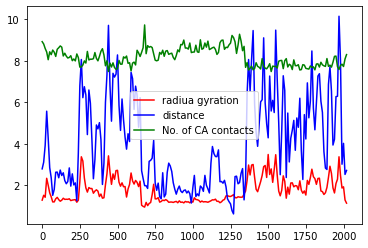

In [46]:
#data analysis
# import PLUMED COLVAR file into pandas dataset
data=plumed.read_as_pandas("/Users/yunyao_1/PycharmProjects/plumed_tutorial/excise_1/masterclass-21-1/excise_1/COLVAR")
plt.plot(data['time'], data['r'], 'r',label= 'radiua gyration')
plt.plot(data['time'], data['d'],'b',label='distance')
plt.plot(data['time'], data['co'],'g',label='No. of CA contacts')
plt.legend()

Text(0, 0.5, 'd [nm]')

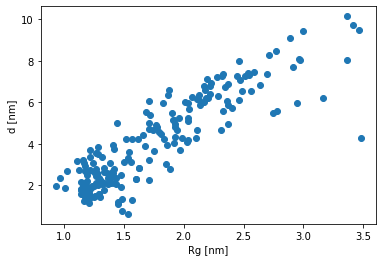

In [51]:
plt.plot(data['r'],data['d'],'o')
plt.xlabel("Rg [nm]")
plt.ylabel("d [nm]")

Text(0, 0.5, 'number of contacts')

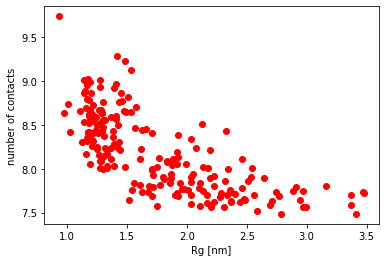

In [54]:
plt.plot(data['r'],data['co'],'ro')
plt.xlabel("Rg [nm]")
plt.ylabel("number of contacts")


## Exercise 2: 
Mastering advanced selection tools

In [ ]:
# Activate MOLINFO functionalities
MOLINFO STRUCTURE=__FILL__ 
# Define the dihedral phi of residue 2 as an explicit list of 4 atoms
t1: TORSION ATOMS=__FILL__ 
# Define the same dihedral using MOLINFO shortcuts
t2: TORSION ATOMS=__FILL__ 
# Print the two collective variables on COLVAR file every step
PRINT ARG=__FILL__ FILE=COLVAR STRIDE=__FILL__ 

In [56]:
#dihedral ϕ is defined by these atoms: C(i-1),N(i),CA(i),C(i)
!awk '{if(($3=="C" && $6==1)||($3=="N" && $6==2)||($3=="CA" && $6==2)||($3=="C" && $6==2))printf "%d,",$2}END{printf "\n"}' data/5-HT1B.pdb

18,20,22,33,


In [57]:
%%bash
# Exercise 2A
# create directory for this exercise
mkdir Exercise-2; cd Exercise-2
# create PLUMED input file
cat > "plumed_A.dat" << EOF
# Activate MOLINFO functionalities
MOLINFO STRUCTURE=../data/5-HT1B.pdb
# Define the dihedral phi of residue 2 as an explicit list of 4 atoms
t1: TORSION ATOMS=18,20,22,33
# Define the same dihedral using MOLINFO shortcuts
t2: TORSION ATOMS=@phi-2
# Print the two collective variables on COLVAR file every step
PRINT ARG=t1,t2 FILE=COLVAR STRIDE=1   
EOF

# run the driver
plumed driver --plumed plumed_A.dat --mf_xtc ../data/5-HT1B.xtc


DRIVER: Found molfile format trajectory xtc with name ../data/5-HT1B.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.8.0 (git: Unknown) compiled on Feb 23 2022 at 09:56:47
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/plumed
PLUMED: For installed feature, see /Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 6684
PLUMED: File suffix: 
PLUMED: FILE: plumed_A.dat
PLUMED: Action MOLINFO
PLUMED:   with label @0
PLUMED:   pdb file named ../data/5-HT1B.pdb contains 2 chains 
PLUMED:   chain named A contains residues 1 to 10 and atoms 1 to 6658 
PLUMED:   chain named B contains residues 391 to 391 and atoms 6659 to 66

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/libplumedKernel.dylib" +++


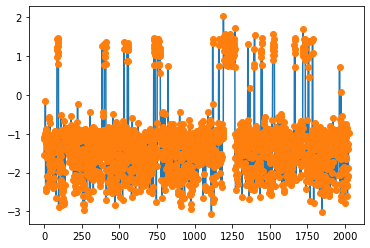

In [63]:
data=plumed.read_as_pandas('./Exercise-2/COLVAR')
plt.plot(data['time'],data['t1'])
plt.plot(data['time'],data['t2'],'o')

In [71]:
%%bash
cd Exercise-2

cat << EOF > 'plumed_B.dat'
MOLINFO STRUCTURE=../data/5-HT1B.pdb

# MDAnalysis syntax:
# MDAnalysis syntax:
r1: GYRATION ATOMS={@mda:{resid 1:40 and name CA}}
d1: DISTANCE ATOMS={@mda:{resid 1 40 and name CA}}

# MDTraj syntax
r2: GYRATION ATOMS={@mdt:{resid 0 to 39 and name CA}}
d2: DISTANCE ATOMS={@mdt:{resid 0 39 and name CA}}

# Print the two collective variables on COLVAR file every step
PRINT ARG=r1,d1,r2,d2 FILE=COLVAR STRIDE=1   
EOF

#run the md
# run the driver
plumed driver --plumed plumed_B.dat --mf_xtc ../data/5-HT1B.xtc


DRIVER: Found molfile format trajectory xtc with name ../data/5-HT1B.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.8.0 (git: Unknown) compiled on Feb 23 2022 at 09:56:47
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/plumed
PLUMED: For installed feature, see /Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 6684
PLUMED: File suffix: 
PLUMED: FILE: plumed_B.dat
PLUMED: Action MOLINFO
PLUMED:   with label @0
PLUMED:   pdb file named ../data/5-HT1B.pdb contains 2 chains 
PLUMED:   chain named A contains residues 1 to 10 and atoms 1 to 6658 
PLUMED:   chain named B contains residues 391 to 391 and atoms 6659 to 66

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/libplumedKernel.dylib" +++


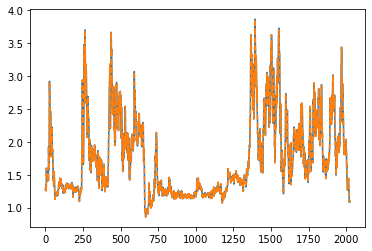

In [77]:
data=plumed.read_as_pandas('./Exercise-2/COLVAR')
#plot.plt()
plt.plot(data['time'],data['r1'])
plt.plot(data['time'],data['r2'],'--')

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/libplumedKernel.dylib" +++


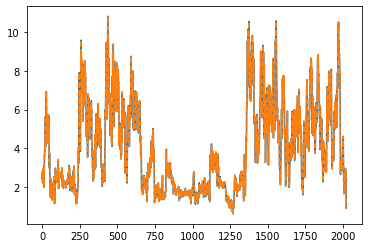

In [78]:
data=plumed.read_as_pandas('./Exercise-2/COLVAR')
#plot.plt()
plt.plot(data['time'],data['d1'])
plt.plot(data['time'],data['d2'],'--')

## Exercise#3
Aim-how to creat ghost atoms

In [80]:
%%bash
mkdir exercise-3
cd exercise-3

cat >plumed.dat <<EOF

MOLINFO STRUCTURE=../data/5-HT1B.pdb

#MOLINFO STRUCTURE=../data/5-HT1B.pdb

# Geometric center of the ligand
lig: CENTER ATOMS=6659-6671 
# Geometric center of the first glycan
g1: CENTER ATOMS=6212-6424
# Geometric center of the second glycan
g2: CENTER ATOMS=6425-6658
# Distance between ligand and first glycan
d1: DISTANCE ATOMS=lig,g1
# Distance between ligand and second glycan
d2: DISTANCE ATOMS=lig,g2
# Print the two distances on COLVAR file every step
PRINT ARG=d1,d2 FILE=COLVAR STRIDE=1
EOF

plumed driver --plumed plumed.dat  --mf_xtc ../data/5-HT1B.xtc

mkdir: exercise-3: File exists



DRIVER: Found molfile format trajectory xtc with name ../data/5-HT1B.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.8.0 (git: Unknown) compiled on Feb 23 2022 at 09:56:47
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/plumed
PLUMED: For installed feature, see /Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 6684
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action MOLINFO
PLUMED:   with label @0
PLUMED:   pdb file named ../data/5-HT1B.pdb contains 2 chains 
PLUMED:   chain named A contains residues 1 to 10 and atoms 1 to 6658 
PLUMED:   chain named B contains residues 391 to 391 and atoms 6659 to 6684

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/libplumedKernel.dylib" +++


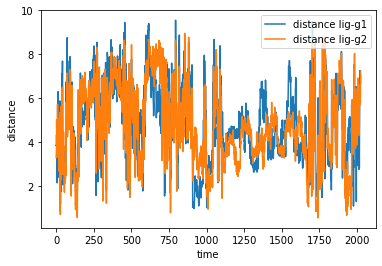

In [83]:
data=plumed.read_as_pandas("./Exercise-3/COLVAR")
# plot time serie of distances to glycans
plt.plot(data["time"],data["d1"],label="distance lig-g1")
plt.plot(data["time"],data["d2"],label="distance lig-g2")
plt.xlabel('time')
plt.ylabel('distance')
plt.legend()

Text(0, 0.5, 'lig2-glycan-dis')

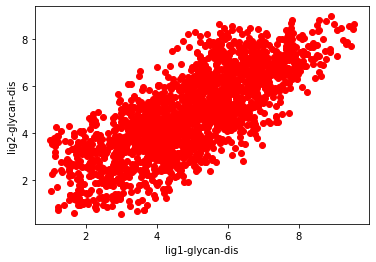

In [86]:
plt.plot(data['d1'],data['d2'],'ro')
plt.xlabel('lig1-glycan-dis')
plt.ylabel('lig2-glycan-dis')

# Exericese #4
AIM1-fix disconinuity due to PBC 
AIM2-calculate alpha  para-beta and anti-beta secondary structure

In [91]:
%%bash
mkdir Exercise-4
cd Exercise-4
cat >plumed.dat  <<EOF
# Activate MOLINFO functionalities
MOLINFO STRUCTURE=../data/5-HT1B.pdb
# make the first 40 N-terminal residues whole # fix PBC issue
WHOLEMOLECULES ENTITY0={@mda:{ protein and resid 1:40}}
# alpha-helix content of residues 1-40
h: ALPHARMSD RESIDUES=1-40 TYPE=OPTIMAL 
# parallel beta-sheet content of residues 1-40
pb: PARABETARMSD RESIDUES=1-40 TYPE=OPTIMAL 
# antiparallel beta sheet-content of residues 1-40
ab: ANTIBETARMSD RESIDUES=1-40 TYPE=OPTIMAL 
# now we create a new CV that sums parallel and antiparallel beta-sheet contents
b: COMBINE ARG=pb,ab PERIODIC=NO 
# Print the alpha-helical content and the *total* beta-sheet content on COLVAR file every step
PRINT ARG=h,b FILE=COLVAR STRIDE=1
EOF

Plumed driver --plumed plumed.dat --mf_xtc ../data/5-HT1B.xtc

mkdir: Exercise-4: File exists



DRIVER: Found molfile format trajectory xtc with name ../data/5-HT1B.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.8.0 (git: Unknown) compiled on Feb 23 2022 at 09:56:47
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/plumed
PLUMED: For installed feature, see /Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 6684
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action MOLINFO
PLUMED:   with label @0
PLUMED:   pdb file named ../data/5-HT1B.pdb contains 2 chains 
PLUMED:   chain named A contains residues 1 to 10 and atoms 1 to 6658 
PLUMED:   chain named B contains residues 391 to 391 and atoms 6659 to 6684

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/libplumedKernel.dylib" +++


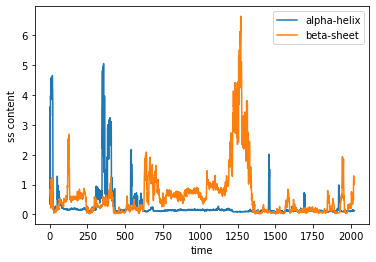

In [99]:
data=plumed.read_as_pandas('./Exercise-4/COLVAR')
plt.plot(data.time, data.h, label='alpha-helix')
plt.plot(data.time, data.b,label='beta-sheet')
plt.xlabel('time')
plt.ylabel('ss content ')
plt.legend()

Text(0, 0.5, 'beta-sheet content')

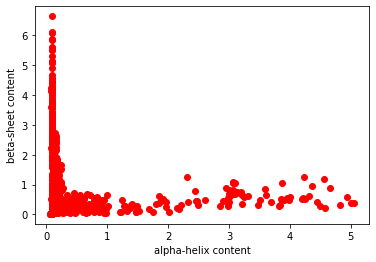

In [100]:
# plot one against the other
plt.plot(data.h,data.b, 'ro')
# x-y axis labels
plt.xlabel("alpha-helix content")
plt.ylabel("beta-sheet content")

In [105]:
#count the percentage 
h=0.0
b =0.0
for i in range(len(data.time)):
    if data['h'][i]>=1: h+=1.0
    if data['b'][i]>=1: b+=1.0

print('percentage of alpha-helix: %.4f'%(h/len(data.time)*100))
print('percentage of beta-sheet: %.4f'%(b/len(data.time)*100))

percentage of alpha-helix: 4.3951
percentage of beta-sheet: 14.3704


# Exercise 5
Aim-learn to calculate RMSD
optimally align a conformation to the reference;
calculate the displacement from the reference conformation after optimal alignment

In [108]:
#used mdanalysis 
#when occupancy is 1 used for align
#when tempfactor is 1 used for RMSD calculation
u=MDAnalysis.Universe('./data/5-HT1B.pdb')
#set everything to zero
for at in u.atoms:
    at.occupancy=0.0
    at.tempfactor=0.0
#select the two groups
resid_1_40=u.select_atoms('protein and resid 1:40')
resid_41_390=u.select_atoms('protein and resid 41:390')
for at in resid_41_390:
    at.occupancy=1.0
for at in resid_1_40:
    at.tempfactor=1.0
    
#write the first reference
u.atoms.write('./data/ref-1.pdb')

for at in resid_1_40:
    at.tempfactor=0.0
for at in resid_41_390:
    at.tempfactor=1.0
    
#write the second reference
u.atoms.write('./data/ref-2.pdb')

    
    

/Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:747: UserWarning: Unit cell dimensions not found. CRYST1 record set to unitary values.
  warnings.warn("Unit cell dimensions not found. "


In [109]:
%%bash
mkdir Exercise-5
cd Exercise-5
cat > plumed.dat <<EOF
#MOLINFO STURCTURE=../data/5-HT1B.pdb
#WHOLEMOLECULE ENTITY0=
rmsd1: RMSD REFERENCE=../data/ref-1.pdb TYPE=OPTIMAL
# Backbone RMSD of residues 41-390 with alignment on same atoms
rmsd2: RMSD REFERENCE=../data/ref-2.pdb TYPE=OPTIMAL

# Print the two RMSD CVs on COLVAR file every step
PRINT ARG=rmsd1,rmsd2 FILE=COLVAR STRIDE=1
EOF

# run the driver
plumed driver --plumed plumed.dat --mf_xtc ../data/5-HT1B.xtc


DRIVER: Found molfile format trajectory xtc with name ../data/5-HT1B.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.8.0 (git: Unknown) compiled on Feb 23 2022 at 09:56:47
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/plumed
PLUMED: For installed feature, see /Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 6684
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action RMSD
PLUMED:   with label rmsd1
PLUMED:   reference from file ../data/ref-1.pdb
PLUMED:   which contains 6684 atoms
PLUMED:   with indices : 
PLUMED: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 
PLUMED: 26 27 28 29 30 3

PLUMED: 1576 1577 1578 1579 1580 1581 1582 1583 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597 1598 1599 1600 
PLUMED: 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625 
PLUMED: 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 
PLUMED: 1651 1652 1653 1654 1655 1656 1657 1658 1659 1660 1661 1662 1663 1664 1665 1666 1667 1668 1669 1670 1671 1672 1673 1674 1675 
PLUMED: 1676 1677 1678 1679 1680 1681 1682 1683 1684 1685 1686 1687 1688 1689 1690 1691 1692 1693 1694 1695 1696 1697 1698 1699 1700 
PLUMED: 1701 1702 1703 1704 1705 1706 1707 1708 1709 1710 1711 1712 1713 1714 1715 1716 1717 1718 1719 1720 1721 1722 1723 1724 1725 
PLUMED: 1726 1727 1728 1729 1730 1731 1732 1733 1734 1735 1736 1737 1738 1739 1740 1741 1742 1743 1744 1745 1746 1747 1748 1749 1750 
PLUMED: 1751 1752 1753 1754 1755 1756 1757 1758 1759 1760 1761

PLUMED: 3126 3127 3128 3129 3130 3131 3132 3133 3134 3135 3136 3137 3138 3139 3140 3141 3142 3143 3144 3145 3146 3147 3148 3149 3150 
PLUMED: 3151 3152 3153 3154 3155 3156 3157 3158 3159 3160 3161 3162 3163 3164 3165 3166 3167 3168 3169 3170 3171 3172 3173 3174 3175 
PLUMED: 3176 3177 3178 3179 3180 3181 3182 3183 3184 3185 3186 3187 3188 3189 3190 3191 3192 3193 3194 3195 3196 3197 3198 3199 3200 
PLUMED: 3201 3202 3203 3204 3205 3206 3207 3208 3209 3210 3211 3212 3213 3214 3215 3216 3217 3218 3219 3220 3221 3222 3223 3224 3225 
PLUMED: 3226 3227 3228 3229 3230 3231 3232 3233 3234 3235 3236 3237 3238 3239 3240 3241 3242 3243 3244 3245 3246 3247 3248 3249 3250 
PLUMED: 3251 3252 3253 3254 3255 3256 3257 3258 3259 3260 3261 3262 3263 3264 3265 3266 3267 3268 3269 3270 3271 3272 3273 3274 3275 
PLUMED: 3276 3277 3278 3279 3280 3281 3282 3283 3284 3285 3286 3287 3288 3289 3290 3291 3292 3293 3294 3295 3296 3297 3298 3299 3300 
PLUMED: 3301 3302 3303 3304 3305 3306 3307 3308 3309 3310 3311

PLUMED: 4676 4677 4678 4679 4680 4681 4682 4683 4684 4685 4686 4687 4688 4689 4690 4691 4692 4693 4694 4695 4696 4697 4698 4699 4700 
PLUMED: 4701 4702 4703 4704 4705 4706 4707 4708 4709 4710 4711 4712 4713 4714 4715 4716 4717 4718 4719 4720 4721 4722 4723 4724 4725 
PLUMED: 4726 4727 4728 4729 4730 4731 4732 4733 4734 4735 4736 4737 4738 4739 4740 4741 4742 4743 4744 4745 4746 4747 4748 4749 4750 
PLUMED: 4751 4752 4753 4754 4755 4756 4757 4758 4759 4760 4761 4762 4763 4764 4765 4766 4767 4768 4769 4770 4771 4772 4773 4774 4775 
PLUMED: 4776 4777 4778 4779 4780 4781 4782 4783 4784 4785 4786 4787 4788 4789 4790 4791 4792 4793 4794 4795 4796 4797 4798 4799 4800 
PLUMED: 4801 4802 4803 4804 4805 4806 4807 4808 4809 4810 4811 4812 4813 4814 4815 4816 4817 4818 4819 4820 4821 4822 4823 4824 4825 
PLUMED: 4826 4827 4828 4829 4830 4831 4832 4833 4834 4835 4836 4837 4838 4839 4840 4841 4842 4843 4844 4845 4846 4847 4848 4849 4850 
PLUMED: 4851 4852 4853 4854 4855 4856 4857 4858 4859 4860 4861

PLUMED: 6226 6227 6228 6229 6230 6231 6232 6233 6234 6235 6236 6237 6238 6239 6240 6241 6242 6243 6244 6245 6246 6247 6248 6249 6250 
PLUMED: 6251 6252 6253 6254 6255 6256 6257 6258 6259 6260 6261 6262 6263 6264 6265 6266 6267 6268 6269 6270 6271 6272 6273 6274 6275 
PLUMED: 6276 6277 6278 6279 6280 6281 6282 6283 6284 6285 6286 6287 6288 6289 6290 6291 6292 6293 6294 6295 6296 6297 6298 6299 6300 
PLUMED: 6301 6302 6303 6304 6305 6306 6307 6308 6309 6310 6311 6312 6313 6314 6315 6316 6317 6318 6319 6320 6321 6322 6323 6324 6325 
PLUMED: 6326 6327 6328 6329 6330 6331 6332 6333 6334 6335 6336 6337 6338 6339 6340 6341 6342 6343 6344 6345 6346 6347 6348 6349 6350 
PLUMED: 6351 6352 6353 6354 6355 6356 6357 6358 6359 6360 6361 6362 6363 6364 6365 6366 6367 6368 6369 6370 6371 6372 6373 6374 6375 
PLUMED: 6376 6377 6378 6379 6380 6381 6382 6383 6384 6385 6386 6387 6388 6389 6390 6391 6392 6393 6394 6395 6396 6397 6398 6399 6400 
PLUMED: 6401 6402 6403 6404 6405 6406 6407 6408 6409 6410 6411

PLUMED: 1251 1252 1253 1254 1255 1256 1257 1258 1259 1260 1261 1262 1263 1264 1265 1266 1267 1268 1269 1270 1271 1272 1273 1274 1275 
PLUMED: 1276 1277 1278 1279 1280 1281 1282 1283 1284 1285 1286 1287 1288 1289 1290 1291 1292 1293 1294 1295 1296 1297 1298 1299 1300 
PLUMED: 1301 1302 1303 1304 1305 1306 1307 1308 1309 1310 1311 1312 1313 1314 1315 1316 1317 1318 1319 1320 1321 1322 1323 1324 1325 
PLUMED: 1326 1327 1328 1329 1330 1331 1332 1333 1334 1335 1336 1337 1338 1339 1340 1341 1342 1343 1344 1345 1346 1347 1348 1349 1350 
PLUMED: 1351 1352 1353 1354 1355 1356 1357 1358 1359 1360 1361 1362 1363 1364 1365 1366 1367 1368 1369 1370 1371 1372 1373 1374 1375 
PLUMED: 1376 1377 1378 1379 1380 1381 1382 1383 1384 1385 1386 1387 1388 1389 1390 1391 1392 1393 1394 1395 1396 1397 1398 1399 1400 
PLUMED: 1401 1402 1403 1404 1405 1406 1407 1408 1409 1410 1411 1412 1413 1414 1415 1416 1417 1418 1419 1420 1421 1422 1423 1424 1425 
PLUMED: 1426 1427 1428 1429 1430 1431 1432 1433 1434 1435 1436

PLUMED: 2801 2802 2803 2804 2805 2806 2807 2808 2809 2810 2811 2812 2813 2814 2815 2816 2817 2818 2819 2820 2821 2822 2823 2824 2825 
PLUMED: 2826 2827 2828 2829 2830 2831 2832 2833 2834 2835 2836 2837 2838 2839 2840 2841 2842 2843 2844 2845 2846 2847 2848 2849 2850 
PLUMED: 2851 2852 2853 2854 2855 2856 2857 2858 2859 2860 2861 2862 2863 2864 2865 2866 2867 2868 2869 2870 2871 2872 2873 2874 2875 
PLUMED: 2876 2877 2878 2879 2880 2881 2882 2883 2884 2885 2886 2887 2888 2889 2890 2891 2892 2893 2894 2895 2896 2897 2898 2899 2900 
PLUMED: 2901 2902 2903 2904 2905 2906 2907 2908 2909 2910 2911 2912 2913 2914 2915 2916 2917 2918 2919 2920 2921 2922 2923 2924 2925 
PLUMED: 2926 2927 2928 2929 2930 2931 2932 2933 2934 2935 2936 2937 2938 2939 2940 2941 2942 2943 2944 2945 2946 2947 2948 2949 2950 
PLUMED: 2951 2952 2953 2954 2955 2956 2957 2958 2959 2960 2961 2962 2963 2964 2965 2966 2967 2968 2969 2970 2971 2972 2973 2974 2975 
PLUMED: 2976 2977 2978 2979 2980 2981 2982 2983 2984 2985 2986

PLUMED: 4351 4352 4353 4354 4355 4356 4357 4358 4359 4360 4361 4362 4363 4364 4365 4366 4367 4368 4369 4370 4371 4372 4373 4374 4375 
PLUMED: 4376 4377 4378 4379 4380 4381 4382 4383 4384 4385 4386 4387 4388 4389 4390 4391 4392 4393 4394 4395 4396 4397 4398 4399 4400 
PLUMED: 4401 4402 4403 4404 4405 4406 4407 4408 4409 4410 4411 4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423 4424 4425 
PLUMED: 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437 4438 4439 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450 
PLUMED: 4451 4452 4453 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465 4466 4467 4468 4469 4470 4471 4472 4473 4474 4475 
PLUMED: 4476 4477 4478 4479 4480 4481 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492 4493 4494 4495 4496 4497 4498 4499 4500 
PLUMED: 4501 4502 4503 4504 4505 4506 4507 4508 4509 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520 4521 4522 4523 4524 4525 
PLUMED: 4526 4527 4528 4529 4530 4531 4532 4533 4534 4535 4536

PLUMED: 5901 5902 5903 5904 5905 5906 5907 5908 5909 5910 5911 5912 5913 5914 5915 5916 5917 5918 5919 5920 5921 5922 5923 5924 5925 
PLUMED: 5926 5927 5928 5929 5930 5931 5932 5933 5934 5935 5936 5937 5938 5939 5940 5941 5942 5943 5944 5945 5946 5947 5948 5949 5950 
PLUMED: 5951 5952 5953 5954 5955 5956 5957 5958 5959 5960 5961 5962 5963 5964 5965 5966 5967 5968 5969 5970 5971 5972 5973 5974 5975 
PLUMED: 5976 5977 5978 5979 5980 5981 5982 5983 5984 5985 5986 5987 5988 5989 5990 5991 5992 5993 5994 5995 5996 5997 5998 5999 6000 
PLUMED: 6001 6002 6003 6004 6005 6006 6007 6008 6009 6010 6011 6012 6013 6014 6015 6016 6017 6018 6019 6020 6021 6022 6023 6024 6025 
PLUMED: 6026 6027 6028 6029 6030 6031 6032 6033 6034 6035 6036 6037 6038 6039 6040 6041 6042 6043 6044 6045 6046 6047 6048 6049 6050 
PLUMED: 6051 6052 6053 6054 6055 6056 6057 6058 6059 6060 6061 6062 6063 6064 6065 6066 6067 6068 6069 6070 6071 6072 6073 6074 6075 
PLUMED: 6076 6077 6078 6079 6080 6081 6082 6083 6084 6085 6086

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/libplumedKernel.dylib" +++


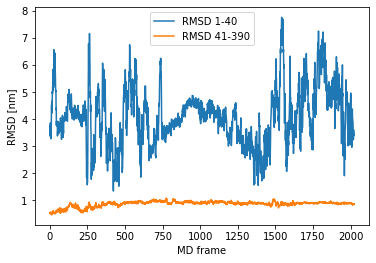

In [110]:
# import PLUMED COLVAR file into pandas dataset
data=plumed.read_as_pandas("./Exercise-5/COLVAR")
# plot time serie of RMSDs
plt.plot(data["time"],data["rmsd1"],label="RMSD 1-40")
plt.plot(data["time"],data["rmsd2"],label="RMSD 41-390")
# x-y axis labels
plt.xlabel("MD frame")
plt.ylabel("RMSD [nm]")
plt.legend()

# Exerecise-6
## fix PBC issue for subjects around the protein using wraparound
#### then, make sure the ligand is not broken by PBCs and in the same cell as the protein, using the WRAPAROUND action and the ###GROUPBY option;
### to align the stable protein residues (as defined in Exercise 5: Using RMSD to measure conformational changes, ####i.e. residues 41 to 390) to the template 5-HT1B.pdb, you can use FIT_TO_TEMPLATE;
### at this point, you can safely define the position of the geometric center of the ligand using the POSITION CV ####with the option NOPBC;
### the requested CV is the z component of the POSITION CV.


In [126]:
%%bash
mkdir Exercise-6
cd Exercise-6
cat > plumed.dat <<EOF
MOLINFO STRUCTURE=../data/5-HT1B.pdb
#make the protein as a whole
WHOLEMOLECULES ENTITY0={@mda:{protein}}

#sele ligand based on resname
lig: GROUP ATOMS={@mda:{resname LIG}}
#wrap the ligand around resid1-40; GROUPBY IS NEEDED TO make sure broken ligand (26 atoms) stay as a whole
WRAPAROUND ATOMS=lig AROUND={@mda:{protein and resid 1:40}} GROUPBY=26
#wrap glycan around the residue N24 and N32
WRAPAROUND ATOMS=6212-6424 AROUND={@mda:{protein and resid 24}} GROUPBY=213
WRAPAROUND ATOMS=6425-6658 AROUND={@mda:{protein and resid 32}} GROUPBY=234

#NOW fit to the template (which is the initial configure wihtout drifting, membreane in x-y plane)
FIT_TO_TEMPLATE REFERENCE=../data/ref-2.pdb

# dump conformations (all atoms: protein+glycans+ligand) to file to check
DUMPATOMS ATOMS=1-6684 FILE=5-HT1B_aligned.gro

#define the center of the ligand
c_ligand: CENTER ATOMS=lig
#define coordinate of the c_ligand; attention: use ATOM instead of ATOMS
p: POSITION ATOM=c_ligand NOPBC
PRINT ARG=p.z FILE=COLVAR STRIDE=1
EOF

plumed driver --plumed plumed.dat --mf_xtc ../data/5-HT1B.xtc




mkdir: Exercise-6: File exists



DRIVER: Found molfile format trajectory xtc with name ../data/5-HT1B.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.8.0 (git: Unknown) compiled on Feb 23 2022 at 09:56:47
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/plumed
PLUMED: For installed feature, see /Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 6684
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action MOLINFO
PLUMED:   with label @0
PLUMED:   pdb file named ../data/5-HT1B.pdb contains 2 chains 
PLUMED:   chain named A contains residues 1 to 10 and atoms 1 to 6658 
PLUMED:   chain named B contains residues 391 to 391 and atoms 6659 to 6684

PLUMED: Action GROUP
PLUMED:   with label lig
PLUMED:   symbol mda:resname LIG will be sent to python interpreter
PLUMED:   selection interpreted using MDAnalysis [3]
PLUMED:   list of atoms:
PLUMED:  6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683
PLUMED:  6684
PLUMED: Action WRAPAROUND
PLUMED:   with label @3
PLUMED:   with stride 1
PLUMED:   symbol mda:protein and resid 1:40 will be sent to python interpreter
PLUMED:   selection interpreted using MDAnalysis [3]
PLUMED:   atoms in reference : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133

PLUMED: 551 552 553 554 555 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575 
PLUMED: 576 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591 592 593 594 595 596 597 598 599 600 
PLUMED: 601 602 603 604 605 606 607 608 609 610 611 612 613 614 615 616 617 618 619 620 621 622 623 624 625 
PLUMED: 626 627 628 629 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645 646 647 648 649 650 
PLUMED: 651 652 653 654 655 656 657 658 659 660 661 662 663 664 665 666 667 668 669 670 671 672 673 674 675 
PLUMED: 676 677 678 679 680 681 682 683 684 685 686 687 688 689 690 691 692 693 694 695 696 697 698 699 700 
PLUMED: 701 702 703 704 705 706 707 708 709 710 711 712 713 714 715 716 717 718 719 720 721 722 723 724 725 
PLUMED: 726 727 728 729 730 731 732 733 734 735 736 737 738 739 740 741 742 743 744 745 746 747 748 749 750 
PLUMED: 751 752 753 754 755 756 757 758 759 760 761 762 763 764 765 766 767 768 769 770 771 772 773 774 775 
PLUMED: 776 777 778

PLUMED: 2176 2177 2178 2179 2180 2181 2182 2183 2184 2185 2186 2187 2188 2189 2190 2191 2192 2193 2194 2195 2196 2197 2198 2199 2200 
PLUMED: 2201 2202 2203 2204 2205 2206 2207 2208 2209 2210 2211 2212 2213 2214 2215 2216 2217 2218 2219 2220 2221 2222 2223 2224 2225 
PLUMED: 2226 2227 2228 2229 2230 2231 2232 2233 2234 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245 2246 2247 2248 2249 2250 
PLUMED: 2251 2252 2253 2254 2255 2256 2257 2258 2259 2260 2261 2262 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272 2273 2274 2275 
PLUMED: 2276 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286 2287 2288 2289 2290 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300 
PLUMED: 2301 2302 2303 2304 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314 2315 2316 2317 2318 2319 2320 2321 2322 2323 2324 2325 
PLUMED: 2326 2327 2328 2329 2330 2331 2332 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342 2343 2344 2345 2346 2347 2348 2349 2350 
PLUMED: 2351 2352 2353 2354 2355 2356 2357 2358 2359 2360 2361

PLUMED: 3726 3727 3728 3729 3730 3731 3732 3733 3734 3735 3736 3737 3738 3739 3740 3741 3742 3743 3744 3745 3746 3747 3748 3749 3750 
PLUMED: 3751 3752 3753 3754 3755 3756 3757 3758 3759 3760 3761 3762 3763 3764 3765 3766 3767 3768 3769 3770 3771 3772 3773 3774 3775 
PLUMED: 3776 3777 3778 3779 3780 3781 3782 3783 3784 3785 3786 3787 3788 3789 3790 3791 3792 3793 3794 3795 3796 3797 3798 3799 3800 
PLUMED: 3801 3802 3803 3804 3805 3806 3807 3808 3809 3810 3811 3812 3813 3814 3815 3816 3817 3818 3819 3820 3821 3822 3823 3824 3825 
PLUMED: 3826 3827 3828 3829 3830 3831 3832 3833 3834 3835 3836 3837 3838 3839 3840 3841 3842 3843 3844 3845 3846 3847 3848 3849 3850 
PLUMED: 3851 3852 3853 3854 3855 3856 3857 3858 3859 3860 3861 3862 3863 3864 3865 3866 3867 3868 3869 3870 3871 3872 3873 3874 3875 
PLUMED: 3876 3877 3878 3879 3880 3881 3882 3883 3884 3885 3886 3887 3888 3889 3890 3891 3892 3893 3894 3895 3896 3897 3898 3899 3900 
PLUMED: 3901 3902 3903 3904 3905 3906 3907 3908 3909 3910 3911

PLUMED: 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300 
PLUMED: 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 
PLUMED: 5326 5327 5328 5329 5330 5331 5332 5333 5334 5335 5336 5337 5338 5339 5340 5341 5342 5343 5344 5345 5346 5347 5348 5349 5350 
PLUMED: 5351 5352 5353 5354 5355 5356 5357 5358 5359 5360 5361 5362 5363 5364 5365 5366 5367 5368 5369 5370 5371 5372 5373 5374 5375 
PLUMED: 5376 5377 5378 5379 5380 5381 5382 5383 5384 5385 5386 5387 5388 5389 5390 5391 5392 5393 5394 5395 5396 5397 5398 5399 5400 
PLUMED: 5401 5402 5403 5404 5405 5406 5407 5408 5409 5410 5411 5412 5413 5414 5415 5416 5417 5418 5419 5420 5421 5422 5423 5424 5425 
PLUMED: 5426 5427 5428 5429 5430 5431 5432 5433 5434 5435 5436 5437 5438 5439 5440 5441 5442 5443 5444 5445 5446 5447 5448 5449 5450 
PLUMED: 5451 5452 5453 5454 5455 5456 5457 5458 5459 5460 5461

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action CENTER
PLUMED:   with label c_ligand
PLUMED:   serial associated to this virtual atom is 6685
PLUMED:   of atoms:
PLUMED:  6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683
PLUMED:  6684
PLUMED:  using the geometric center
PLUMED:   broken molecules will be rebuilt assuming atoms are in the proper order
PLUMED: Action POSITION
PLUMED:   with label p
PLUMED:   for atom 6685
PLUMED:   without periodic boundary conditions
PLUMED:   added component to this action:  p.x 
PLUMED:   added component to this action:  p.y 
PLUMED:   added component to this action:  p.z 
PLUMED:   WARNING: components will not have the proper periodicity - see manual
PLUMED: Action PRINT
PLUMED:   with label @10
PLUMED:   with stride 1
PLUMED:   with arguments p.z
PLUMED:   on file COLVAR
PLUMED:   with format  %f
PLUMED: END FILE: plumed.dat
PLUMED: Timestep

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/libplumedKernel.dylib" +++


Text(0, 0.5, 'distance')

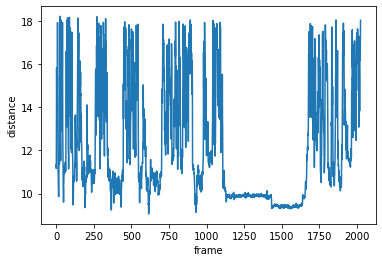

In [125]:
data=plumed.read_as_pandas('./Exercise-6/COLVAR')
plt.plot(data.time, data['p.z'])
plt.xlabel('frame')
plt.ylabel('distance')

## Exercise-7
compute the fraction of bound conformations over the total number of frames in the MD trajectory;
for each individual residue and glycan, compute the fraction of bound conformation per residue/glycan;
dump all bound conformations to a gro file, after fixing PBCs as in Exercise 6: Aligning conformations to a template;
for each individual residue and glycan, dump all bound conformations to a separate gro file, after fixing PBCs.


we arbitrarily define as bound a conformation in which at least one pair of atoms of the ligand and of the protein/residue/glycan is closer than 0.4 nm;
any pre-exisiting CV defined in the PLUMED manual can be used;
any CV defined directly by the user in the PLUMED input file via the CUSTOM action can be used.

In [140]:
#since loops are needed, using python is more convenient to creat plumed.dat file
!mkdir Exercise-7
with open ('./Exercise-7/plumed.dat','w') as f:
    print("""
MOLINFO STRUCTURE=../data/5-HT1B.pdb
#make the protein as a whole
WHOLEMOLECULES ENTITY0={@mda:{protein}}

#sele ligand based on resname
lig: GROUP ATOMS={@mda:{resname LIG}}
#sel the Nterminal
Nterm: GROUP ATOMS={@mda:{protein and resid 1:40}}
#sele glycan atoms
gly_N24: GROUP ATOMS=6212-6424
gly_N32: GROUP ATOMS=6425-6658
#wrap the ligand around resid1-40; GROUPBY IS NEEDED TO make sure broken ligand (26 atoms) stay as a whole
WRAPAROUND ATOMS=lig AROUND={@mda:{protein and resid 1:40}} GROUPBY=26
#wrap glycan around the residue N24 and N32
WRAPAROUND ATOMS=6212-6424 AROUND={@mda:{protein and resid 24}} GROUPBY=213
WRAPAROUND ATOMS=6425-6658 AROUND={@mda:{protein and resid 32}} GROUPBY=234

#NOW fit to the template (which is the initial configure wihtout drifting, membreane in x-y plane)
FIT_TO_TEMPLATE REFERENCE=../data/ref-2.pdb

#define collective varaible
#calcualte the minimun distance between ligand and Nterm gly_N24 gly_N32 using distances(see manual)
r0: DISTANCES GROUPA=lig  GROUPB=Nterm,gly_N24,gly_N32 NOPBC MIN={BETA=50} 
# in the following, calculate the minimum distance from ligand for each residues and glycans
""",file=f)
    for i in range(1,41):
        print('r%d: DISTANCES GROUPA=lig GROUPB={@mda:{protein and resid %d}} NOPBC MIN={BETA=50}' %(i, i),file=f)
    print("""
# minimum distance to glycans
g1: DISTANCES GROUPA=lig GROUPB=gly_N24 NOPBC MIN={BETA=50}
g2: DISTANCES GROUPA=lig GROUPB=gly_N32 NOPBC MIN={BETA=50}
""",file=f)
    
#print out the bound conformation using update_if (action will be taken only if certain certeria are met)
    for i in range (1,41):
        print("""
UPDATE_IF ARG=r%d.min LESS_THAN=0.4
DUMPATOMS ATOMS=1-6684 FILE=bound_r%d.gro
UPDATE_IF ARG=r%d.min END               
        """%(i, i, i),file=f)

    for i in range (1,3):
        print("""
UPDATE_IF ARG=g%d.min LESS_THAN=0.4
DUMPATOMS ATOMS=1-6684 FILE=bound_r%d.gro
UPDATE_IF ARG=g%d.min END               
        """%(i, i, i),file=f)

#print out all the collective varibles
    for i in range (0,41):
        print('PRINT ARG=r%d.min FILE=COLVAR_r%d STRIDE=1'%(i,i),file=f)
    print("PRINT FILE=COLVAR_g1 ARG=g1.min STRIDE=1", file=f)
    print("PRINT FILE=COLVAR_g2 ARG=g2.min STRIDE=1", file=f)
            

mkdir: Exercise-7: File exists


In [141]:
%%bash

cd Exercise-7

plumed driver --plumed plumed.dat --mf_xtc ../data/5-HT1B.xtc



DRIVER: Found molfile format trajectory xtc with name ../data/5-HT1B.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.8.0 (git: Unknown) compiled on Feb 23 2022 at 09:56:47
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/plumed
PLUMED: For installed feature, see /Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 6684
PLUMED: File suffix: 
PLUMED: FILE: plumed.dat
PLUMED: Action MOLINFO
PLUMED:   with label @0
PLUMED:   pdb file named ../data/5-HT1B.pdb contains 2 chains 
PLUMED:   chain named A contains residues 1 to 10 and atoms 1 to 6658 
PLUMED:   chain named B contains residues 391 to 391 and atoms 6659 to 6684

PLUMED: Action GROUP
PLUMED:   with label lig
PLUMED:   symbol mda:resname LIG will be sent to python interpreter
PLUMED:   selection interpreted using MDAnalysis [3]
PLUMED:   list of atoms:
PLUMED:  6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683
PLUMED:  6684
PLUMED: Action GROUP
PLUMED:   with label Nterm
PLUMED:   symbol mda:protein and resid 1:40 will be sent to python interpreter
PLUMED:   selection interpreted using MDAnalysis [3]
PLUMED:   list of atoms:
PLUMED:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
PLUMED:  26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
PLUMED:  51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
PLUMED:  76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100
PLUMED:  101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
PLUMED:  126 127 1

PLUMED:   atoms in reference : 313 314 315 316 317 318 319 320 321 322 323 324 325
PLUMED:   atoms to be wrapped : 6212 6213 6214 6215 6216 6217 6218 6219 6220 6221 6222 6223 6224 6225 6226 6227 6228 6229 6230 6231 6232 6233 6234 6235 6236 6237 6238 6239 6240 6241 6242 6243 6244 6245 6246 6247 6248 6249 6250 6251 6252 6253 6254 6255 6256 6257 6258 6259 6260 6261 6262 6263 6264 6265 6266 6267 6268 6269 6270 6271 6272 6273 6274 6275 6276 6277 6278 6279 6280 6281 6282 6283 6284 6285 6286 6287 6288 6289 6290 6291 6292 6293 6294 6295 6296 6297 6298 6299 6300 6301 6302 6303 6304 6305 6306 6307 6308 6309 6310 6311 6312 6313 6314 6315 6316 6317 6318 6319 6320 6321 6322 6323 6324 6325 6326 6327 6328 6329 6330 6331 6332 6333 6334 6335 6336 6337 6338 6339 6340 6341 6342 6343 6344 6345 6346 6347 6348 6349 6350 6351 6352 6353 6354 6355 6356 6357 6358 6359 6360 6361 6362 6363 6364 6365 6366 6367 6368 6369 6370 6371 6372 6373 6374 6375 6376 6377 6378 6379 6380 6381 6382 6383 6384 6385 6386 6387 6388 

PLUMED: 1201 1202 1203 1204 1205 1206 1207 1208 1209 1210 1211 1212 1213 1214 1215 1216 1217 1218 1219 1220 1221 1222 1223 1224 1225 
PLUMED: 1226 1227 1228 1229 1230 1231 1232 1233 1234 1235 1236 1237 1238 1239 1240 1241 1242 1243 1244 1245 1246 1247 1248 1249 1250 
PLUMED: 1251 1252 1253 1254 1255 1256 1257 1258 1259 1260 1261 1262 1263 1264 1265 1266 1267 1268 1269 1270 1271 1272 1273 1274 1275 
PLUMED: 1276 1277 1278 1279 1280 1281 1282 1283 1284 1285 1286 1287 1288 1289 1290 1291 1292 1293 1294 1295 1296 1297 1298 1299 1300 
PLUMED: 1301 1302 1303 1304 1305 1306 1307 1308 1309 1310 1311 1312 1313 1314 1315 1316 1317 1318 1319 1320 1321 1322 1323 1324 1325 
PLUMED: 1326 1327 1328 1329 1330 1331 1332 1333 1334 1335 1336 1337 1338 1339 1340 1341 1342 1343 1344 1345 1346 1347 1348 1349 1350 
PLUMED: 1351 1352 1353 1354 1355 1356 1357 1358 1359 1360 1361 1362 1363 1364 1365 1366 1367 1368 1369 1370 1371 1372 1373 1374 1375 
PLUMED: 1376 1377 1378 1379 1380 1381 1382 1383 1384 1385 1386

PLUMED: 2751 2752 2753 2754 2755 2756 2757 2758 2759 2760 2761 2762 2763 2764 2765 2766 2767 2768 2769 2770 2771 2772 2773 2774 2775 
PLUMED: 2776 2777 2778 2779 2780 2781 2782 2783 2784 2785 2786 2787 2788 2789 2790 2791 2792 2793 2794 2795 2796 2797 2798 2799 2800 
PLUMED: 2801 2802 2803 2804 2805 2806 2807 2808 2809 2810 2811 2812 2813 2814 2815 2816 2817 2818 2819 2820 2821 2822 2823 2824 2825 
PLUMED: 2826 2827 2828 2829 2830 2831 2832 2833 2834 2835 2836 2837 2838 2839 2840 2841 2842 2843 2844 2845 2846 2847 2848 2849 2850 
PLUMED: 2851 2852 2853 2854 2855 2856 2857 2858 2859 2860 2861 2862 2863 2864 2865 2866 2867 2868 2869 2870 2871 2872 2873 2874 2875 
PLUMED: 2876 2877 2878 2879 2880 2881 2882 2883 2884 2885 2886 2887 2888 2889 2890 2891 2892 2893 2894 2895 2896 2897 2898 2899 2900 
PLUMED: 2901 2902 2903 2904 2905 2906 2907 2908 2909 2910 2911 2912 2913 2914 2915 2916 2917 2918 2919 2920 2921 2922 2923 2924 2925 
PLUMED: 2926 2927 2928 2929 2930 2931 2932 2933 2934 2935 2936

PLUMED: 4301 4302 4303 4304 4305 4306 4307 4308 4309 4310 4311 4312 4313 4314 4315 4316 4317 4318 4319 4320 4321 4322 4323 4324 4325 
PLUMED: 4326 4327 4328 4329 4330 4331 4332 4333 4334 4335 4336 4337 4338 4339 4340 4341 4342 4343 4344 4345 4346 4347 4348 4349 4350 
PLUMED: 4351 4352 4353 4354 4355 4356 4357 4358 4359 4360 4361 4362 4363 4364 4365 4366 4367 4368 4369 4370 4371 4372 4373 4374 4375 
PLUMED: 4376 4377 4378 4379 4380 4381 4382 4383 4384 4385 4386 4387 4388 4389 4390 4391 4392 4393 4394 4395 4396 4397 4398 4399 4400 
PLUMED: 4401 4402 4403 4404 4405 4406 4407 4408 4409 4410 4411 4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423 4424 4425 
PLUMED: 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437 4438 4439 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450 
PLUMED: 4451 4452 4453 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464 4465 4466 4467 4468 4469 4470 4471 4472 4473 4474 4475 
PLUMED: 4476 4477 4478 4479 4480 4481 4482 4483 4484 4485 4486

PLUMED: 5851 5852 5853 5854 5855 5856 5857 5858 5859 5860 5861 5862 5863 5864 5865 5866 5867 5868 5869 5870 5871 5872 5873 5874 5875 
PLUMED: 5876 5877 5878 5879 5880 5881 5882 5883 5884 5885 5886 5887 5888 5889 5890 5891 5892 5893 5894 5895 5896 5897 5898 5899 5900 
PLUMED: 5901 5902 5903 5904 5905 5906 5907 5908 5909 5910 5911 5912 5913 5914 5915 5916 5917 5918 5919 5920 5921 5922 5923 5924 5925 
PLUMED: 5926 5927 5928 5929 5930 5931 5932 5933 5934 5935 5936 5937 5938 5939 5940 5941 5942 5943 5944 5945 5946 5947 5948 5949 5950 
PLUMED: 5951 5952 5953 5954 5955 5956 5957 5958 5959 5960 5961 5962 5963 5964 5965 5966 5967 5968 5969 5970 5971 5972 5973 5974 5975 
PLUMED: 5976 5977 5978 5979 5980 5981 5982 5983 5984 5985 5986 5987 5988 5989 5990 5991 5992 5993 5994 5995 5996 5997 5998 5999 6000 
PLUMED: 6001 6002 6003 6004 6005 6006 6007 6008 6009 6010 6011 6012 6013 6014 6015 6016 6017 6018 6019 6020 6021 6022 6023 6024 6025 
PLUMED: 6026 6027 6028 6029 6030 6031 6032 6033 6034 6035 6036

PLUMED:   added component to this action:  r0.min 
PLUMED:   value r0.min is obtained by taking the 1th component and finding the minimum value. Beta is equal to 50
PLUMED: Action DISTANCES
PLUMED:   with label r1
PLUMED:   keyword GROUPA takes atoms : 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 
PLUMED:   symbol mda:protein and resid 1 will be sent to python interpreter
PLUMED:   selection interpreted using MDAnalysis [3]
PLUMED:   keyword GROUPB takes atoms : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 
PLUMED:   added component to this action:  r1.min 
PLUMED:   value r1.min is obtained by taking the 1th component and finding the minimum value. Beta is equal to 50
PLUMED: Action DISTANCES
PLUMED:   with label r2
PLUMED:   keyword GROUPA takes atoms : 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 
PLUMED:   symbo

PLUMED:   selection interpreted using MDAnalysis [3]
PLUMED:   keyword GROUPB takes atoms : 175 176 177 178 179 180 181 182 183 184 
PLUMED:   added component to this action:  r14.min 
PLUMED:   value r14.min is obtained by taking the 1th component and finding the minimum value. Beta is equal to 50
PLUMED: Action DISTANCES
PLUMED:   with label r15
PLUMED:   keyword GROUPA takes atoms : 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 
PLUMED:   symbol mda:protein and resid 15 will be sent to python interpreter
PLUMED:   selection interpreted using MDAnalysis [3]
PLUMED:   keyword GROUPB takes atoms : 185 186 187 188 189 190 191 
PLUMED:   added component to this action:  r15.min 
PLUMED:   value r15.min is obtained by taking the 1th component and finding the minimum value. Beta is equal to 50
PLUMED: Action DISTANCES
PLUMED:   with label r16
PLUMED:   keyword GROUPA takes atoms : 6659 6660 6661 6662 6663 6

PLUMED: Action DISTANCES
PLUMED:   with label r28
PLUMED:   keyword GROUPA takes atoms : 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 
PLUMED:   symbol mda:protein and resid 28 will be sent to python interpreter
PLUMED:   selection interpreted using MDAnalysis [3]
PLUMED:   keyword GROUPB takes atoms : 367 368 369 370 371 372 373 374 375 376 
PLUMED:   added component to this action:  r28.min 
PLUMED:   value r28.min is obtained by taking the 1th component and finding the minimum value. Beta is equal to 50
PLUMED: Action DISTANCES
PLUMED:   with label r29
PLUMED:   keyword GROUPA takes atoms : 6659 6660 6661 6662 6663 6664 6665 6666 6667 6668 6669 6670 6671 6672 6673 6674 6675 6676 6677 6678 6679 6680 6681 6682 6683 6684 
PLUMED:   symbol mda:protein and resid 29 will be sent to python interpreter
PLUMED:   selection interpreted using MDAnalysis [3]
PLUMED:   keyword GROUPB takes atoms : 377 378 379 38

PLUMED:   keyword GROUPB takes atoms : 6212 6213 6214 6215 6216 6217 6218 6219 6220 6221 6222 6223 6224 6225 6226 6227 6228 6229 6230 6231 6232 6233 6234 6235 6236 6237 6238 6239 6240 6241 6242 6243 6244 6245 6246 6247 6248 6249 6250 6251 6252 6253 6254 6255 6256 6257 6258 6259 6260 6261 6262 6263 6264 6265 6266 6267 6268 6269 6270 6271 6272 6273 6274 6275 6276 6277 6278 6279 6280 6281 6282 6283 6284 6285 6286 6287 6288 6289 6290 6291 6292 6293 6294 6295 6296 6297 6298 6299 6300 6301 6302 6303 6304 6305 6306 6307 6308 6309 6310 6311 6312 6313 6314 6315 6316 6317 6318 6319 6320 6321 6322 6323 6324 6325 6326 6327 6328 6329 6330 6331 6332 6333 6334 6335 6336 6337 6338 6339 6340 6341 6342 6343 6344 6345 6346 6347 6348 6349 6350 6351 6352 6353 6354 6355 6356 6357 6358 6359 6360 6361 6362 6363 6364 6365 6366 6367 6368 6369 6370 6371 6372 6373 6374 6375 6376 6377 6378 6379 6380 6381 6382 6383 6384 6385 6386 6387 6388 6389 6390 6391 6392 6393 6394 6395 6396 6397 6398 6399 6400 6401 6402 6403 6

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @55
PLUMED:   with stride 1
PLUMED:   with arguments r1.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @56
PLUMED:   with stride 1
PLUMED:   with arguments r2.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @57
PLUMED:   with stride 1
PLUMED:   file name bound_r2.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r2.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 11

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @58
PLUMED:   with stride 1
PLUMED:   with arguments r2.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @59
PLUMED:   with stride 1
PLUMED:   with arguments r3.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @60
PLUMED:   with stride 1
PLUMED:   file name bound_r3.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r3.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 11

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @61
PLUMED:   with stride 1
PLUMED:   with arguments r3.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @62
PLUMED:   with stride 1
PLUMED:   with arguments r4.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @63
PLUMED:   with stride 1
PLUMED:   file name bound_r4.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r4.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 11

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @64
PLUMED:   with stride 1
PLUMED:   with arguments r4.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @65
PLUMED:   with stride 1
PLUMED:   with arguments r5.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @66
PLUMED:   with stride 1
PLUMED:   file name bound_r5.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r5.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 11

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @67
PLUMED:   with stride 1
PLUMED:   with arguments r5.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @68
PLUMED:   with stride 1
PLUMED:   with arguments r6.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @69
PLUMED:   with stride 1
PLUMED:   file name bound_r6.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r6.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 11

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @70
PLUMED:   with stride 1
PLUMED:   with arguments r6.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @71
PLUMED:   with stride 1
PLUMED:   with arguments r7.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @72
PLUMED:   with stride 1
PLUMED:   file name bound_r7.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r7.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 11

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @73
PLUMED:   with stride 1
PLUMED:   with arguments r7.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @74
PLUMED:   with stride 1
PLUMED:   with arguments r8.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @75
PLUMED:   with stride 1
PLUMED:   file name bound_r8.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r8.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 11

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @76
PLUMED:   with stride 1
PLUMED:   with arguments r8.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @77
PLUMED:   with stride 1
PLUMED:   with arguments r9.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @78
PLUMED:   with stride 1
PLUMED:   file name bound_r9.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r9.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 11

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @79
PLUMED:   with stride 1
PLUMED:   with arguments r9.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @80
PLUMED:   with stride 1
PLUMED:   with arguments r10.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @81
PLUMED:   with stride 1
PLUMED:   file name bound_r10.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r10.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @82
PLUMED:   with stride 1
PLUMED:   with arguments r10.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @83
PLUMED:   with stride 1
PLUMED:   with arguments r11.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @84
PLUMED:   with stride 1
PLUMED:   file name bound_r11.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r11.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 11

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @85
PLUMED:   with stride 1
PLUMED:   with arguments r11.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @86
PLUMED:   with stride 1
PLUMED:   with arguments r12.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @87
PLUMED:   with stride 1
PLUMED:   file name bound_r12.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r12.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 11

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @88
PLUMED:   with stride 1
PLUMED:   with arguments r12.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @89
PLUMED:   with stride 1
PLUMED:   with arguments r13.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @90
PLUMED:   with stride 1
PLUMED:   file name bound_r13.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r13.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 11

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @91
PLUMED:   with stride 1
PLUMED:   with arguments r13.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @92
PLUMED:   with stride 1
PLUMED:   with arguments r14.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @93
PLUMED:   with stride 1
PLUMED:   file name bound_r14.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r14.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 11

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @94
PLUMED:   with stride 1
PLUMED:   with arguments r14.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @95
PLUMED:   with stride 1
PLUMED:   with arguments r15.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @96
PLUMED:   with stride 1
PLUMED:   file name bound_r15.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r15.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 11

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @97
PLUMED:   with stride 1
PLUMED:   with arguments r15.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @98
PLUMED:   with stride 1
PLUMED:   with arguments r16.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @99
PLUMED:   with stride 1
PLUMED:   file name bound_r16.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r16.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 11

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @100
PLUMED:   with stride 1
PLUMED:   with arguments r16.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @101
PLUMED:   with stride 1
PLUMED:   with arguments r17.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @102
PLUMED:   with stride 1
PLUMED:   file name bound_r17.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r17.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @103
PLUMED:   with stride 1
PLUMED:   with arguments r17.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @104
PLUMED:   with stride 1
PLUMED:   with arguments r18.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @105
PLUMED:   with stride 1
PLUMED:   file name bound_r18.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r18.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @106
PLUMED:   with stride 1
PLUMED:   with arguments r18.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @107
PLUMED:   with stride 1
PLUMED:   with arguments r19.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @108
PLUMED:   with stride 1
PLUMED:   file name bound_r19.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r19.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @109
PLUMED:   with stride 1
PLUMED:   with arguments r19.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @110
PLUMED:   with stride 1
PLUMED:   with arguments r20.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @111
PLUMED:   with stride 1
PLUMED:   file name bound_r20.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r20.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @112
PLUMED:   with stride 1
PLUMED:   with arguments r20.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @113
PLUMED:   with stride 1
PLUMED:   with arguments r21.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @114
PLUMED:   with stride 1
PLUMED:   file name bound_r21.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r21.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @115
PLUMED:   with stride 1
PLUMED:   with arguments r21.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @116
PLUMED:   with stride 1
PLUMED:   with arguments r22.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @117
PLUMED:   with stride 1
PLUMED:   file name bound_r22.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r22.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @118
PLUMED:   with stride 1
PLUMED:   with arguments r22.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @119
PLUMED:   with stride 1
PLUMED:   with arguments r23.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @120
PLUMED:   with stride 1
PLUMED:   file name bound_r23.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r23.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @121
PLUMED:   with stride 1
PLUMED:   with arguments r23.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @122
PLUMED:   with stride 1
PLUMED:   with arguments r24.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @123
PLUMED:   with stride 1
PLUMED:   file name bound_r24.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r24.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @124
PLUMED:   with stride 1
PLUMED:   with arguments r24.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @125
PLUMED:   with stride 1
PLUMED:   with arguments r25.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @126
PLUMED:   with stride 1
PLUMED:   file name bound_r25.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r25.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @127
PLUMED:   with stride 1
PLUMED:   with arguments r25.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @128
PLUMED:   with stride 1
PLUMED:   with arguments r26.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @129
PLUMED:   with stride 1
PLUMED:   file name bound_r26.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r26.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @130
PLUMED:   with stride 1
PLUMED:   with arguments r26.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @131
PLUMED:   with stride 1
PLUMED:   with arguments r27.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @132
PLUMED:   with stride 1
PLUMED:   file name bound_r27.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r27.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @133
PLUMED:   with stride 1
PLUMED:   with arguments r27.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @134
PLUMED:   with stride 1
PLUMED:   with arguments r28.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @135
PLUMED:   with stride 1
PLUMED:   file name bound_r28.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r28.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @136
PLUMED:   with stride 1
PLUMED:   with arguments r28.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @137
PLUMED:   with stride 1
PLUMED:   with arguments r29.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @138
PLUMED:   with stride 1
PLUMED:   file name bound_r29.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r29.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @139
PLUMED:   with stride 1
PLUMED:   with arguments r29.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @140
PLUMED:   with stride 1
PLUMED:   with arguments r30.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @141
PLUMED:   with stride 1
PLUMED:   file name bound_r30.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r30.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @142
PLUMED:   with stride 1
PLUMED:   with arguments r30.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @143
PLUMED:   with stride 1
PLUMED:   with arguments r31.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @144
PLUMED:   with stride 1
PLUMED:   file name bound_r31.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r31.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @145
PLUMED:   with stride 1
PLUMED:   with arguments r31.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @146
PLUMED:   with stride 1
PLUMED:   with arguments r32.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @147
PLUMED:   with stride 1
PLUMED:   file name bound_r32.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r32.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @148
PLUMED:   with stride 1
PLUMED:   with arguments r32.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @149
PLUMED:   with stride 1
PLUMED:   with arguments r33.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @150
PLUMED:   with stride 1
PLUMED:   file name bound_r33.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r33.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @151
PLUMED:   with stride 1
PLUMED:   with arguments r33.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @152
PLUMED:   with stride 1
PLUMED:   with arguments r34.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @153
PLUMED:   with stride 1
PLUMED:   file name bound_r34.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r34.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @154
PLUMED:   with stride 1
PLUMED:   with arguments r34.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @155
PLUMED:   with stride 1
PLUMED:   with arguments r35.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @156
PLUMED:   with stride 1
PLUMED:   file name bound_r35.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r35.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @157
PLUMED:   with stride 1
PLUMED:   with arguments r35.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @158
PLUMED:   with stride 1
PLUMED:   with arguments r36.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @159
PLUMED:   with stride 1
PLUMED:   file name bound_r36.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r36.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @160
PLUMED:   with stride 1
PLUMED:   with arguments r36.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @161
PLUMED:   with stride 1
PLUMED:   with arguments r37.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @162
PLUMED:   with stride 1
PLUMED:   file name bound_r37.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r37.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @163
PLUMED:   with stride 1
PLUMED:   with arguments r37.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @164
PLUMED:   with stride 1
PLUMED:   with arguments r38.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @165
PLUMED:   with stride 1
PLUMED:   file name bound_r38.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r38.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @166
PLUMED:   with stride 1
PLUMED:   with arguments r38.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @167
PLUMED:   with stride 1
PLUMED:   with arguments r39.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @168
PLUMED:   with stride 1
PLUMED:   file name bound_r39.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r39.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @169
PLUMED:   with stride 1
PLUMED:   with arguments r39.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @170
PLUMED:   with stride 1
PLUMED:   with arguments r40.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @171
PLUMED:   with stride 1
PLUMED:   file name bound_r40.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r40.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @172
PLUMED:   with stride 1
PLUMED:   with arguments r40.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @173
PLUMED:   with stride 1
PLUMED:   with arguments g1.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @174
PLUMED:   with stride 1
PLUMED:   file name bound_r1.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r1.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 11

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @175
PLUMED:   with stride 1
PLUMED:   with arguments g1.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action UPDATE_IF
PLUMED:   with label @176
PLUMED:   with stride 1
PLUMED:   with arguments g2.min
PLUMED:   boundaries for argument 0    -1.79769e+308 0.4
PLUMED: Action DUMPATOMS
PLUMED:   with label @177
PLUMED:   with stride 1
PLUMED:   file name bound_r2.gro
PLUMED:   file extension indicates a gro file
PLUMED:   Writing on file bound_r2.gro
PLUMED:   printing the following atoms in PLUMED : 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115

PLUMED:   MOLINFO DATA found with label @0, using proper atom names
PLUMED: Action UPDATE_IF
PLUMED:   with label @178
PLUMED:   with stride 1
PLUMED:   with arguments g2.min
PLUMED:   boundaries for argument 0    -1.79769e+308 1.79769e+308
PLUMED: Action PRINT
PLUMED:   with label @179
PLUMED:   with stride 1
PLUMED:   with arguments r0.min
PLUMED:   on file COLVAR_r0
PLUMED:   with format  %f
PLUMED: Action PRINT
PLUMED:   with label @180
PLUMED:   with stride 1
PLUMED:   with arguments r1.min
PLUMED:   on file COLVAR_r1
PLUMED:   with format  %f
PLUMED: Action PRINT
PLUMED:   with label @181
PLUMED:   with stride 1
PLUMED:   with arguments r2.min
PLUMED:   on file COLVAR_r2
PLUMED:   with format  %f
PLUMED: Action PRINT
PLUMED:   with label @182
PLUMED:   with stride 1
PLUMED:   with arguments r3.min
PLUMED:   on file COLVAR_r3
PLUMED:   with format  %f
PLUMED: Action PRINT
PLUMED:   with label @183
PLUMED:   with stride 1
PLUMED:   with arguments r4.min
PLUMED:   on file COLVAR_r4


PLUMED: 4 Calculating (forward loop)                    2025    12.033220     0.005942     0.005773     0.015180
PLUMED: 5 Applying (backward loop)                      2025     0.836413     0.000413     0.000390     0.001065
PLUMED: 6 Update                                        2025     1.752999     0.000866     0.000024     0.046826


+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/libplumedKernel.dylib" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/libplumedKernel.dylib" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/libplumedKernel.dylib" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/libplumedKernel.dylib" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/libplumedKernel.dylib" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/libplumedKernel.dylib" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/libplumedKernel.dylib" +++

Text(0, 0.5, '% frames')

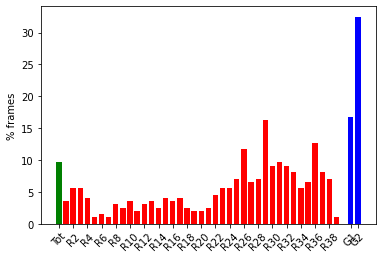

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/libplumedKernel.dylib" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/libplumedKernel.dylib" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/libplumedKernel.dylib" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/libplumedKernel.dylib" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/libplumedKernel.dylib" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/libplumedKernel.dylib" +++
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Users/yunyao_1/miniforge3/envs/plumed-masterclass/lib/libplumedKernel.dylib" +++

In [142]:
#plot as bar plot
bar=[]
for i in range(0,41):
    data=plumed.read_as_pandas('./Exercise-7/COLVAR_r'+ str(i))
    count=0.0
    for d in data['r'+str(i)+'.min']:
        if d <0.4: count+=1.0
    bar.append(count)
    
#same for the glycan
for i in range(1,3):
    # import PLUMED COLVAR_g$i file into pandas dataset
    data=plumed.read_as_pandas("Exercise-7/COLVAR_g"+str(i))
    count=0.
    for d in data["g"+str(i)+".min"]:
        # count bound conformations
        if(d<0.4): count+=1.0
    bar.append(count)
    
for i in range(1,43):
    bar[i] = bar[i] / bar[0] * 100.0
# normalization by total number of frames in MD trajectory
bar[0] = bar[0] / float(len(data["time"])) * 100.0
# create a bar plot
ind=range(0,43)
# total fraction of bound conformations
plt.bar(ind[0],    bar[0],    0.75, color="g")
# fraction of bound conformations per residue
plt.bar(ind[1:-2], bar[1:-2], 0.75, color="r")
# fraction of bound conformations per glycan
plt.bar(ind[-2:],  bar[-2:],  0.75, color="b")
# set ticks and labels
lab = ["Tot"]; ticks=[0]
for i in range(2,40,2):
    lab.append("R"+str(i))
    ticks.append(i)
lab += ["G1","G2"]; ticks += [41,42]
plt.xticks(ticks, lab, rotation=45)
plt.ylabel("% frames")